# Why you need logistic regression 

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn = pd.read_csv('data/churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


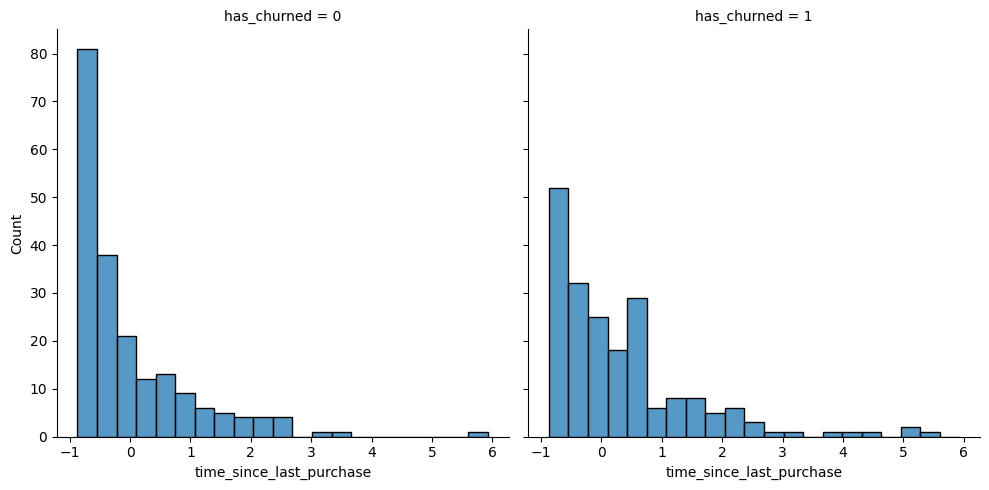

In [7]:
sns.displot(data = churn , x='time_since_last_purchase', col='has_churned')

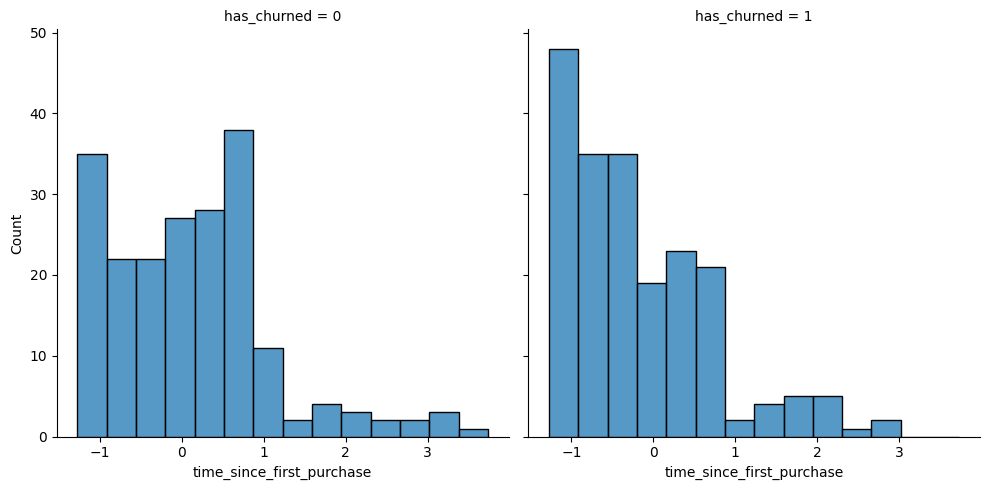

In [8]:
sns.displot(data = churn , x='time_since_first_purchase', col='has_churned')

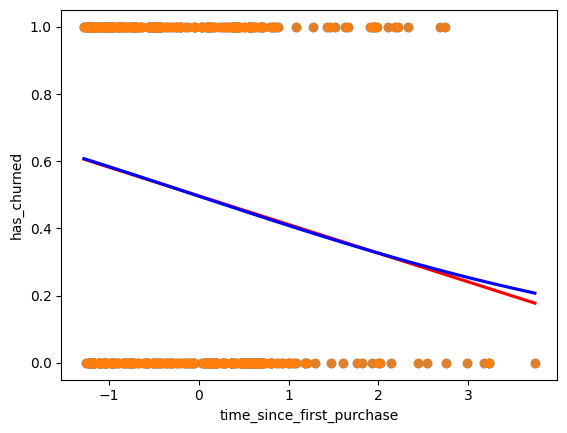

In [10]:
sns.regplot(data= churn,
    y= 'has_churned',
    x='time_since_first_purchase',
    ci=None,
    line_kws={"color": "red"}
)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})
plt.show()

In [17]:
from statsmodels.formula.api import logit 
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase',data=churn).fit()
mdl_churn_vs_relationship.params

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64

# Predictions and odds ratios

In [20]:
explanatory_data = pd.DataFrame({'time_since_first_purchase':np.arange(-1,6.25,0.25)})
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data))
prediction_data.head()

,time_since_first_purchase,has_churned
0,-1.00,0.584096
1,-0.75,0.562401
2,-0.50,0.540465
3,-0.25,0.518370
4,0.00,0.496204


1ra forma

<Axes: xlabel='time_since_first_purchase', ylabel='has_churned'>

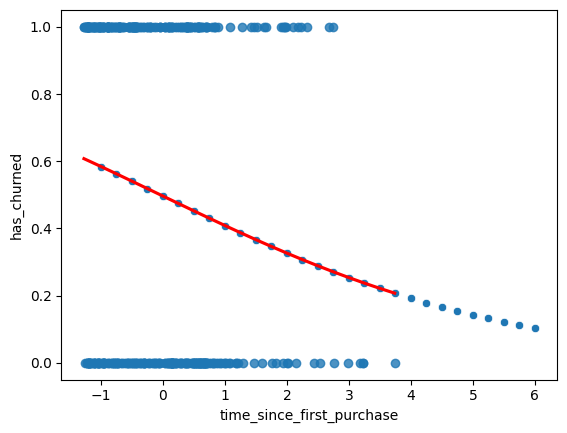

In [25]:
sns.scatterplot(x="time_since_first_purchase",
            y="has_churned",
            data=prediction_data, 
)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic=True,
            line_kws={"color": "red"})

2da forma


<Axes: xlabel='time_since_first_purchase', ylabel='has_churned'>

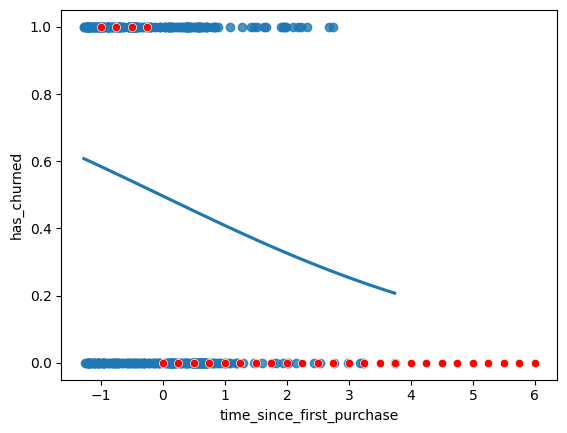

In [32]:
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])
fi=plt.figure()
sns.regplot(
    x='time_since_first_purchase',
    y='has_churned',
    data=churn,
    ci = None,
    logistic=True
)
sns.scatterplot(
    x="time_since_first_purchase",
    y="most_likely_outcome",
    data=prediction_data,
    color='red')


4TA FORMA

In [33]:
prediction_data["odds_ratio"] = prediction_data['has_churned']/(1-prediction_data['has_churned'])

prediction_data.head()

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.00,0.584096,1.0,1.404400
1,-0.75,0.562401,1.0,1.285197
2,-0.50,0.540465,1.0,1.176111
3,-0.25,0.518370,1.0,1.076284
4,0.00,0.496204,0.0,0.984930


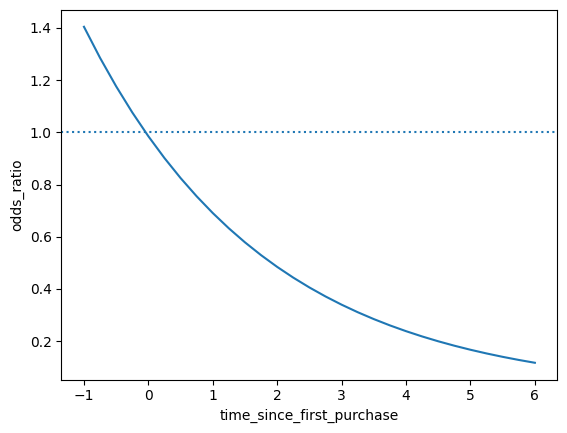

In [35]:
fig = plt.figure()

sns.lineplot(
    y='odds_ratio',
    x='time_since_first_purchase',
    data=prediction_data
)

plt.axhline(y=1, linestyle="dotted")

plt.show()

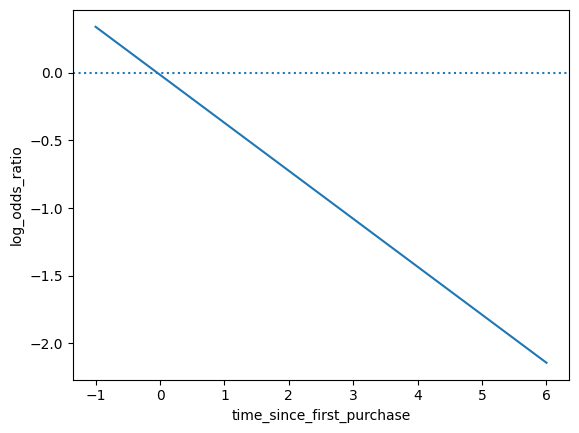

In [37]:
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])

fig = plt.figure()

sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

plt.axhline(y=0, linestyle="dotted")

plt.show()

# Quantifying logistic regression fit

Accuracy = (TN + TP) / (TN + FN + FP + TP)

Sensitivity = TP / (FN + TP)

Specificity = TN / (TN + FP)

La forma manual

In [41]:
actual_response = churn['has_churned']

predicted_response =  np.round(mdl_churn_vs_relationship.predict())

outcomes = pd.DataFrame({'actual_response':actual_response,
                         'predicted_response':predicted_response})
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


la forma con funcion

[[112.  88.]
 [ 76. 124.]]


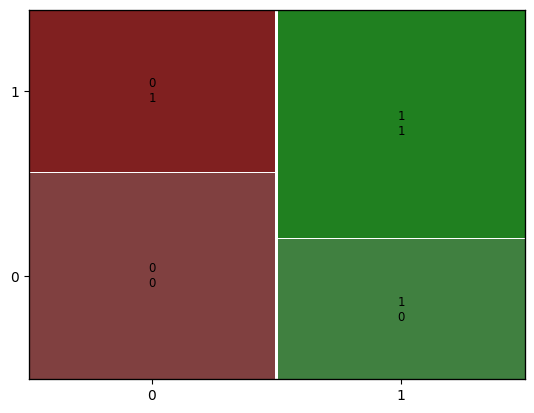

In [46]:
from statsmodels.graphics.mosaicplot import mosaic

conf_matrix = mdl_churn_vs_relationship.pred_table()

print(conf_matrix)

mosaic(conf_matrix)
plt.show()

In [50]:
print(conf_matrix)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

specificity = TN / (TN + FP)
print("Specificity:", specificity)


[[112.  88.]
 [ 76. 124.]]
Accuracy: 0.59
Sensitivity: 0.62
Specificity: 0.56
